# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100.0%

Extracting F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST\raw


111.0%

Extracting F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST\raw


100.0%

Extracting F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST\raw


159.1%

Extracting F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST\raw
Processing...
Done!


Here we can see one of the images.

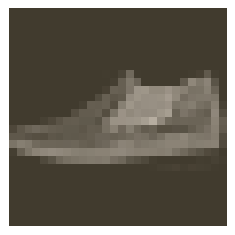

In [13]:
image, label = next(iter(trainloader))
helper.imshow(image[23, :])

In [18]:
print(image.shape)
print(label)

torch.Size([64, 1, 28, 28])
tensor([7, 0, 6, 7, 6, 4, 0, 7, 5, 5, 1, 2, 0, 7, 5, 5, 9, 0, 3, 0, 1, 2, 6, 9,
        1, 2, 7, 7, 8, 2, 4, 2, 3, 1, 0, 0, 5, 3, 9, 2, 6, 7, 6, 0, 2, 4, 6, 7,
        9, 1, 1, 6, 4, 1, 7, 1, 2, 2, 4, 2, 8, 4, 1, 1])


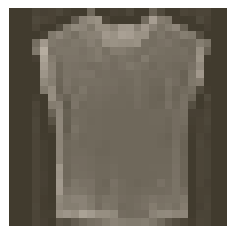

In [17]:
helper.imshow(image[1])

With the data loaded, it's time to import the necessary packages.

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [21]:
# TODO: Define your network architecture here
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size))
                      #nn.Softmax(dim=1))
print(model)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


In [22]:
print(model.parameters())

<generator object Module.parameters at 0x00000188423E4258>


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [23]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [25]:
# TODO: Train the network here
epochs = 3
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3...  Loss: 1.9431
Epoch: 1/3...  Loss: 0.8773
Epoch: 1/3...  Loss: 0.7145
Epoch: 1/3...  Loss: 0.6618
Epoch: 1/3...  Loss: 0.6219
Epoch: 1/3...  Loss: 0.5952
Epoch: 1/3...  Loss: 0.5420
Epoch: 1/3...  Loss: 0.5482
Epoch: 1/3...  Loss: 0.4962
Epoch: 1/3...  Loss: 0.5216
Epoch: 1/3...  Loss: 0.4645
Epoch: 1/3...  Loss: 0.4659
Epoch: 1/3...  Loss: 0.4912
Epoch: 1/3...  Loss: 0.4770
Epoch: 1/3...  Loss: 0.4510
Epoch: 1/3...  Loss: 0.4461
Epoch: 1/3...  Loss: 0.4481
Epoch: 1/3...  Loss: 0.4582
Epoch: 1/3...  Loss: 0.4885
Epoch: 1/3...  Loss: 0.4226
Epoch: 1/3...  Loss: 0.4284
Epoch: 1/3...  Loss: 0.4120
Epoch: 1/3...  Loss: 0.4289
Epoch: 2/3...  Loss: 0.2108
Epoch: 2/3...  Loss: 0.3884
Epoch: 2/3...  Loss: 0.4242
Epoch: 2/3...  Loss: 0.4060
Epoch: 2/3...  Loss: 0.4438
Epoch: 2/3...  Loss: 0.4091
Epoch: 2/3...  Loss: 0.3947
Epoch: 2/3...  Loss: 0.4024
Epoch: 2/3...  Loss: 0.3909
Epoch: 2/3...  Loss: 0.3887
Epoch: 2/3...  Loss: 0.4023
Epoch: 2/3...  Loss: 0.4103
Epoch: 2/3...  Loss:

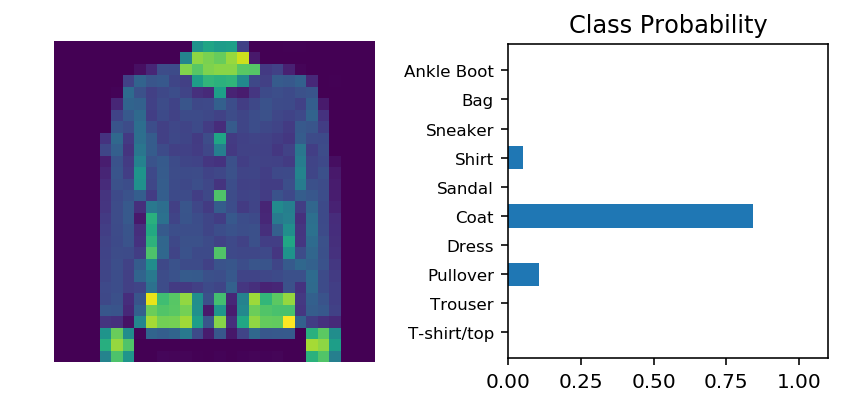

In [26]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model.forward(img) 
# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.